In [75]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [76]:
#dataset loaded
df = pd.read_csv('advertising.csv')

In [77]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [79]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [80]:
#Prepare the data and assign the X and y values
features = ['TV','Radio','Newspaper']
target = ['Sales']

X = df[features]
y = df[target]

In [81]:
X.shape

(200, 3)

In [82]:
y.shape

(200, 1)

In [83]:
# 3. Split the Data into Training and Testing Sets
# We train the model on one part of the data and test it on another

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Using Built-in Skicit Learn model

In [84]:
# 4. Create and Train the Linear Regression Model

lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
y_pred = lr.predict(X_test)

In [86]:
r2_score(y_test,y_pred)

0.9059011844150826

In [87]:
y_test.iloc[:1]

,Sales
95,16.9


In [88]:
y_pred[0]

array([17.0347724])

In [96]:
# Now check the results
print("--- Scikit-learn Linear Regression Results ---")
print(f"Intercept (theta_0): {lr.intercept_:}")
print(f"Coefficients (theta_1, theta_2, theta_3):{lr.coef_:}")

--- Scikit-learn Linear Regression Results ---
Intercept (theta_0): [4.7141264]
Coefficients (theta_1, theta_2, theta_3):[[0.05450927 0.10094536 0.00433665]]


## Implementing My Own Linear Regression Model from scratch

In [97]:
class MyLR:
  def __init__(self):
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis = 1) # added one more row in X_train of 1 values

    #calculate the coeffs
    betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept_ = betas[0]
    self.coef_ = betas[1:]
    print(betas)


  def predict(self,X_test):
    y_pred = np.dot(X_test,self.coef_) + self.intercept_
    return y_pred



In [98]:
mlr = MyLR()

In [99]:
mlr.fit(X_train,y_train)

[[4.71412640e+00]
 [5.45092708e-02]
 [1.00945362e-01]
 [4.33664682e-03]]


In [100]:
my_y_pred = mlr.predict(X_test)

In [101]:
r2_score(y_test,y_pred)

0.9059011844150826

## Visualization according to the Features

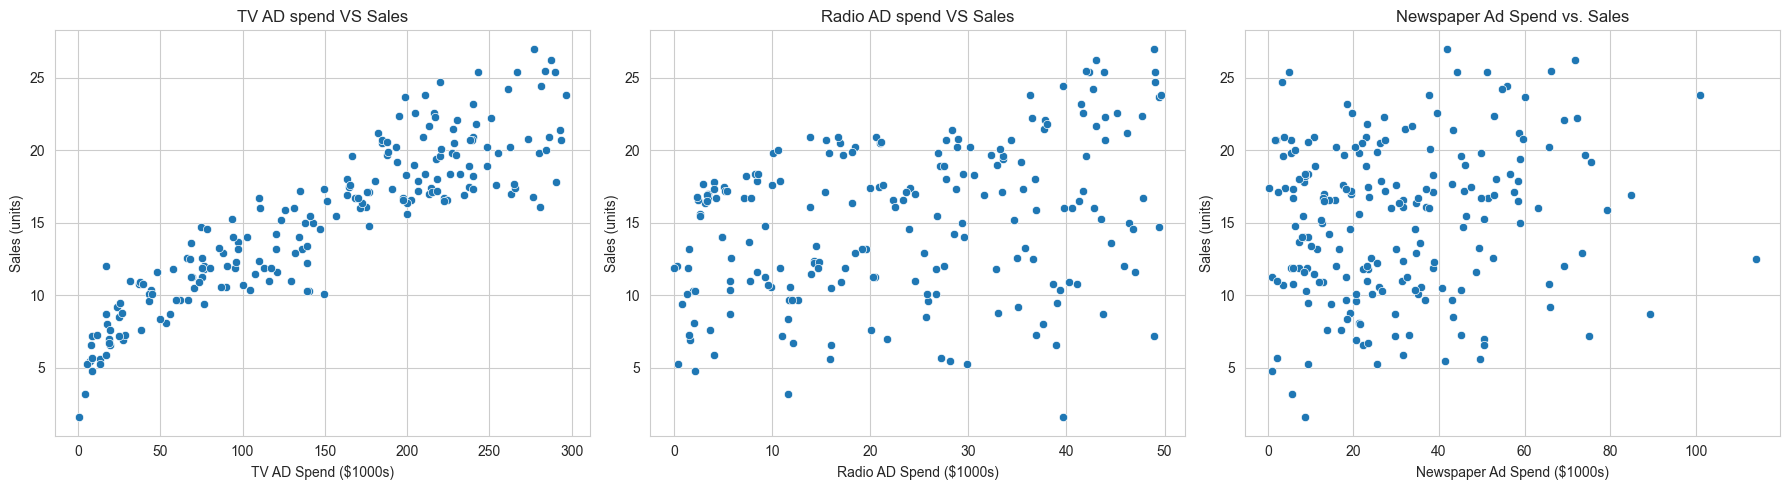

In [45]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,3 ,figsize = (18,5))

#plot 1
sns.scatterplot(data = df, x = 'TV',y='Sales',ax = axes[0])
axes[0].set_title('TV AD spend VS Sales')
axes[0].set_xlabel('TV AD Spend ($1000s)')
axes[0].set_ylabel('Sales (units)')

#plot2
sns.scatterplot(data = df, x = 'Radio',y='Sales',ax = axes[1])
axes[1].set_title('Radio AD spend VS Sales')
axes[1].set_xlabel('Radio AD Spend ($1000s)')
axes[1].set_ylabel('Sales (units)')

# Plot 3: Newspaper vs Sales
sns.scatterplot(data=df, x='Newspaper', y='Sales', ax=axes[2])
axes[2].set_title('Newspaper Ad Spend vs. Sales')
axes[2].set_xlabel('Newspaper Ad Spend ($1000s)')
axes[2].set_ylabel('Sales (units)')

plt.tight_layout()
plt.show()

## Feature vs. Sales with Linear Regression Line

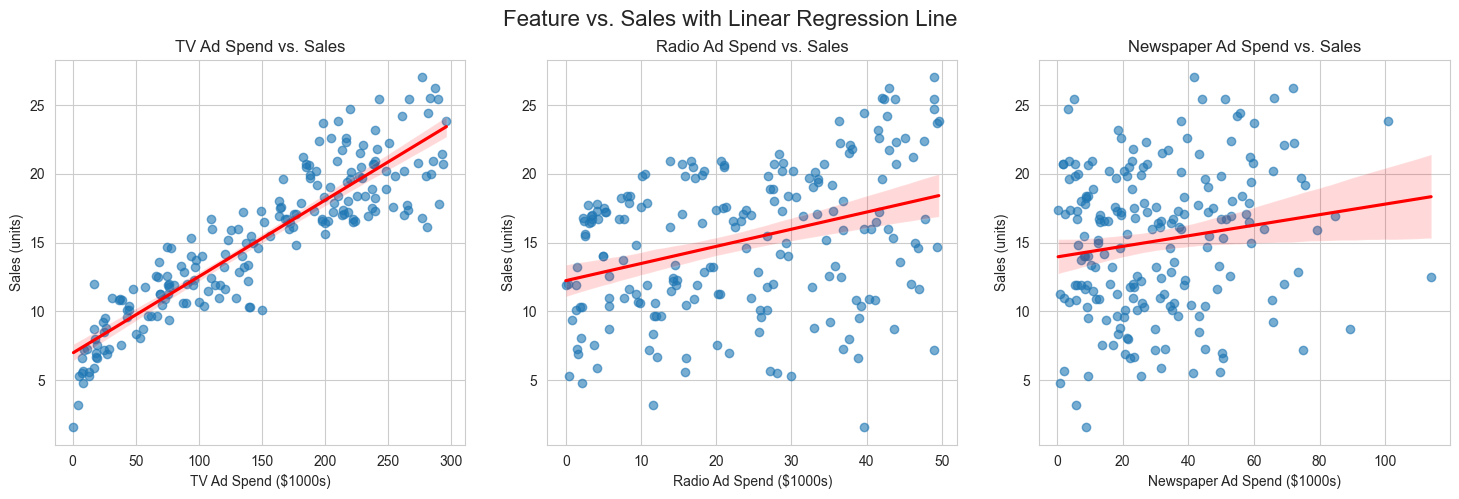

In [60]:
# Set a nice style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Feature vs. Sales with Linear Regression Line', fontsize=16)


# --- Plot 1: TV vs Sales ---
# regplot creates a scatter plot and fits a linear regression line
sns.regplot(data=df, x='TV', y='Sales', ax=axes[0],scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
axes[0].set_title('TV Ad Spend vs. Sales')
axes[0].set_xlabel('TV Ad Spend ($1000s)')
axes[0].set_ylabel('Sales (units)')

# --- Plot 2: Radio vs Sales ---
sns.regplot(data=df, x='Radio', y='Sales', ax=axes[1],scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
axes[1].set_title('Radio Ad Spend vs. Sales')
axes[1].set_xlabel('Radio Ad Spend ($1000s)')
axes[1].set_ylabel('Sales (units)')

# --- Plot 3: Newspaper vs Sales ---
sns.regplot(data = df, x='Newspaper', y = 'Sales',ax= axes[2], scatter_kws={'alpha': 0.6},line_kws = {'color': 'red'} )
axes[2].set_title('Newspaper Ad Spend vs. Sales')
axes[2].set_xlabel('Newspaper Ad Spend ($1000s)')
axes[2].set_ylabel('Sales (units)')


# Adjust the layout to make sure titles and labels don't overlap
# plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to make space for suptitle

# Show the plot
plt.show()


### TV: The line is steep and the points are clustered tightly around it, showing a strong, positive relationship. This is why the 'TV' coefficient in model is the highest.
### Radio: The line is also positive but less steep, and the points are more scattered. It shows a decent but weaker relationship.
### Newspaper: The line is almost flat and the points are all over the place. This visually shows that there is a very weak linear relationship, which is why its coefficient was near zero.

## Final Accuracy Comparison Of Skicit-Learn & My Own Linear Regression

In [103]:
print("r2_score Of Linear Regression: ",r2_score(y_test,y_pred))
print("r2_score Of MyLR: ",r2_score(y_test,my_y_pred))

r2_score Of Linear Regression:  0.9059011844150826
r2_score Of MyLR:  0.9059011844150827
